7. Model Building and Evaluation
8. Model Optimization and Tuning
9. Interpret the Results

##Model Building and Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/jaydeep-1998/Customer-Segmentation/master/clean_data.csv")
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Expenses,NumTotalPurchases,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,1,66,0,1617,25,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,69,2,27,6,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,58,0,776,21,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,39,1,53,8,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,42,1,422,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,...,0,0,0,0,0,37,0,22,4,0
1979,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,56,1,1341,18,0
1980,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,0,0,0,0,0,42,0,1241,19,1
1981,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,67,1,843,23,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1983 non-null   int64  
 1   Education            1983 non-null   object 
 2   Marital_Status       1983 non-null   object 
 3   Income               1983 non-null   float64
 4   Kidhome              1983 non-null   int64  
 5   Teenhome             1983 non-null   int64  
 6   Dt_Customer          1983 non-null   object 
 7   Recency              1983 non-null   int64  
 8   MntWines             1983 non-null   int64  
 9   MntFruits            1983 non-null   int64  
 10  MntMeatProducts      1983 non-null   int64  
 11  MntFishProducts      1983 non-null   int64  
 12  MntSweetProducts     1983 non-null   int64  
 13  MntGoldProds         1983 non-null   int64  
 14  NumDealsPurchases    1983 non-null   int64  
 15  NumWebPurchases      1983 non-null   i

In [4]:
# # Taking Most important features
# drop_column_list = ['Year_Birth', 'Education', 'Marital_Status','Kidhome',
#        'Teenhome', 'Dt_Customer']

# data_modelling_1 = data.drop(drop_column_list,axis=1).copy()
# data_modelling_1

In [5]:
# We will try segmenting cluster in many ways
# This is one of way

data_modelling_2 = data[['Income','Recency','Complain','Age', 'Kids', 'Expenses','NumTotalPurchases', 'TotalAcceptedCmp']].copy()
data_modelling_2

,Income,Recency,Complain,Age,Kids,Expenses,NumTotalPurchases,TotalAcceptedCmp
0,58138.0,58,0,66,0,1617,25,1
1,46344.0,38,0,69,2,27,6,0
2,71613.0,26,0,58,0,776,21,0
3,26646.0,26,0,39,1,53,8,0
4,58293.0,94,0,42,1,422,19,0
...,...,...,...,...,...,...,...,...
1978,26816.0,50,0,37,0,22,4,0
1979,61223.0,46,0,56,1,1341,18,0
1980,56981.0,91,0,42,0,1241,19,1
1981,69245.0,8,0,67,1,843,23,0


In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_2 = StandardScaler()

# Fit the scaler to your data and transform it
standardized_data_modelling_2 = scaler_2.fit_transform(data_modelling_2)

In [7]:
from sklearn.manifold import TSNE

# Reducing dimension using tsne and visualise the data
def plot_tsne(data, n_components=2, random_state=1, perplexity=30, figsize=(7, 7)):

    # Initializing T-SNE
    tsne = TSNE(n_components=n_components, random_state=random_state, perplexity=perplexity)

    # Fitting T-SNE
    data_tsne = tsne.fit_transform(data)

    # Converting to DataFrame
    data_tsne = pd.DataFrame(data_tsne, columns=[f'Component_{i}' for i in range(n_components)])

    # Plotting
    plt.figure(figsize=figsize)
    sns.scatterplot(x='Component_0', y='Component_1', data=data_tsne)
    plt.title(f'T-SNE Visualization (Perplexity={perplexity})')
    plt.show()

    return data_tsne


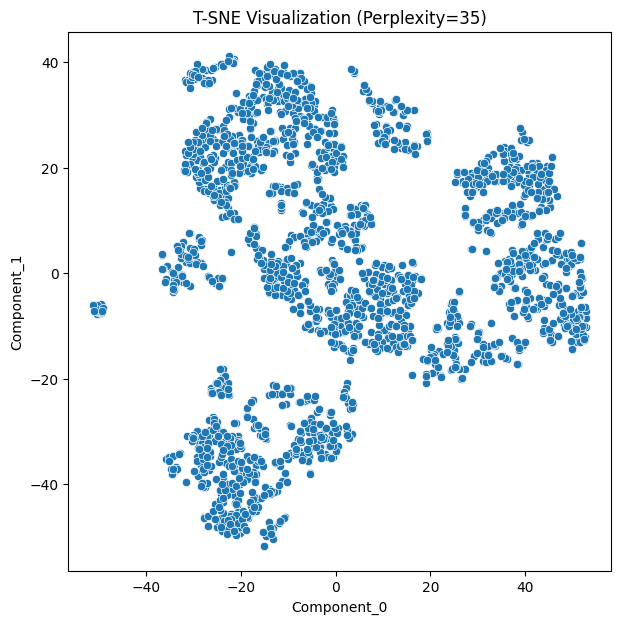

In [8]:
# Assuming you have a DataFrame 'standardized_data_modelling_2'
data_modelling_tsne_2 = plot_tsne(standardized_data_modelling_2, n_components=2, random_state=1, perplexity=35, figsize=(7, 7))


In [9]:
from sklearn.decomposition import PCA

def plot_pca(data, figsize=(7, 7)):

    # Initialize PCA with the same number of components as features
    pca = PCA(n_components=data.shape[1], random_state=1)

    # Fit and transform the data
    data_pca = pd.DataFrame(pca.fit_transform(data))

    # The percentage of variance explained by each principal component is stored
    exp_var = pca.explained_variance_ratio_

    # Scatter plot for two components using the dataframe data_pca
    plt.figure(figsize=figsize)
    sns.scatterplot(x=data_pca[0], y=data_pca[1])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

    return data_pca, exp_var


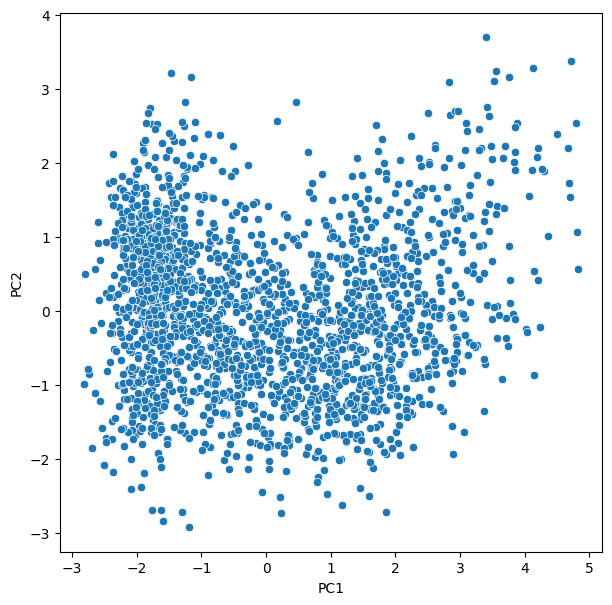

In [10]:
# Assuming you have a DataFrame 'standardized_data_modelling_2'
pca_data_modelling_2, exp_var_pca_data_modelling_2 = plot_pca(standardized_data_modelling_2, figsize=(7, 7))

n_init hyperparameter: by default = 10, which means that the whole algorithm actually runs 10 times when you call fit(), and Scikit-Learn keeps the best solution. But how exactly does it know which solution is the best? Well of course it uses a **performance metric!** It is called the model’s **inertia:** this is the mean squared distance between each instance and its closest centroid.

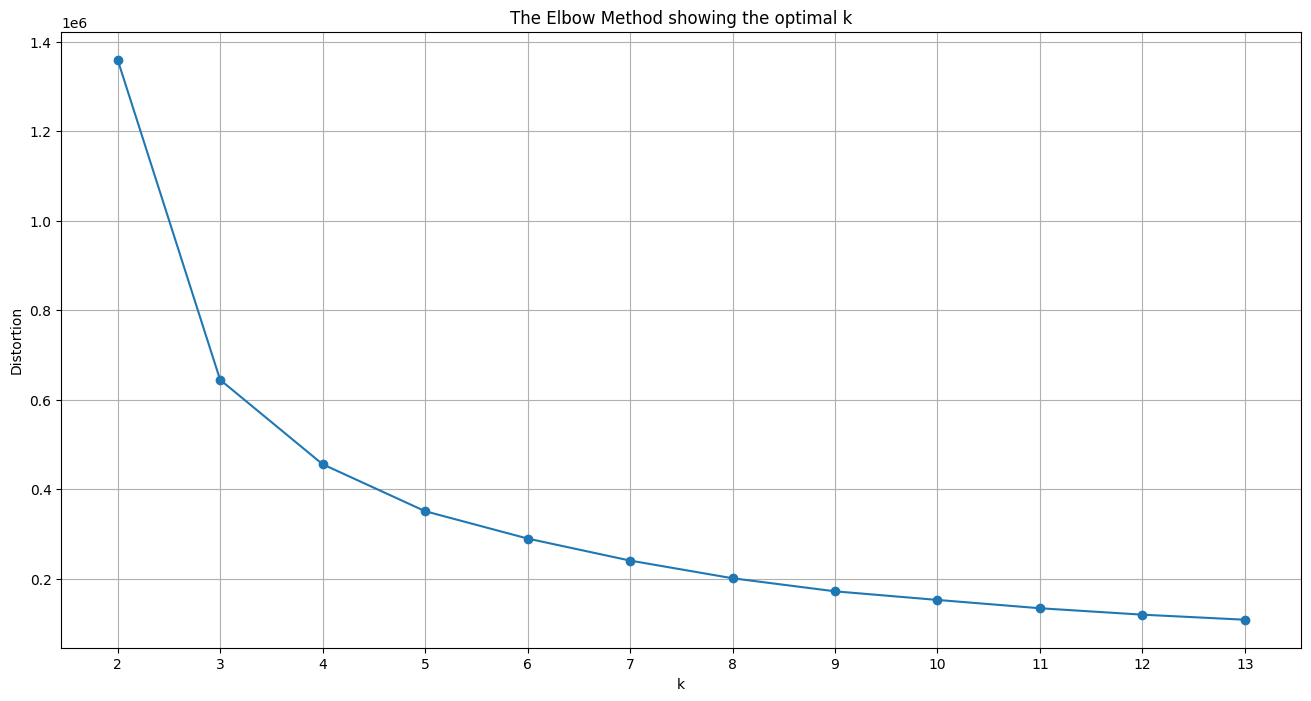

In [17]:
from sklearn.cluster import KMeans

def calculate_distortions(data, k_range, random_state=4):

    distortions = []
    for k in k_range:
        kmeanModel = KMeans(n_clusters=k, n_init=10, random_state=random_state)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)

    return distortions

def plot_elbow(distortions, k_range, figsize=(16, 8)):

    plt.figure(figsize=figsize)
    plt.plot(k_range, distortions, marker='o')
    plt.xlabel("k")
    plt.ylabel("Distortion")
    plt.title("The Elbow Method showing the optimal k")
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

k_range = range(2,14)
distortions = calculate_distortions(data_modelling_tsne_2,k_range)
plot_elbow(distortions,k_range)

**Based on the elbow plot, we observe a distinct "elbow" point at k=4, suggesting an optimal number of clusters. Therefore, we will proceed with k=4 for our KMeans clustering analysis.**

###k-means model

In [15]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state = 1)
kmeans.fit(data_modelling_tsne_2)

data_modelling_tsne_2['k_means_label'] = kmeans.labels_
data_modelling_2['k_means_label'] = kmeans.labels_
data['k_means_label'] = kmeans.labels_

data_modelling_2['k_means_label'].value_counts()

1    638
3    471
2    448
0    426
Name: k_means_label, dtype: int64

<Axes: xlabel='Component_0', ylabel='Component_1'>

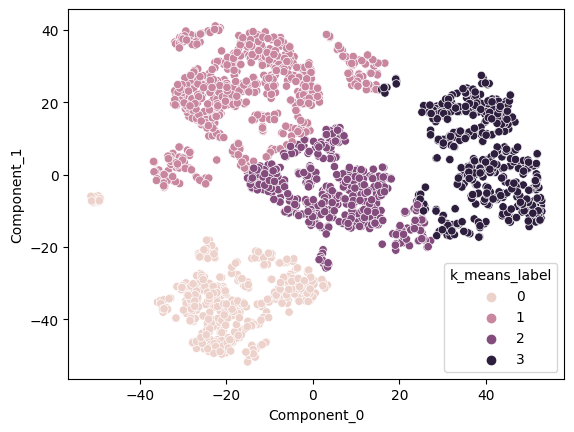

In [16]:
sns.scatterplot(x='Component_0', y='Component_1', data=data_modelling_tsne_2, hue='k_means_label')

In [ ]:
# For each cluster, calculate the mean or median values of each feature. These values represent the central tendency of the data points within that cluster.

In [ ]:
numerical_profiles_2 = data_modelling_2[['Income','Recency','Age','Expenses','NumTotalPurchases','k_means_label']].groupby('k_means_label').mean()
categorical_profiles_2 = data_modelling_2[['Complain','Kids','TotalAcceptedCmp','k_means_label']].groupby('k_means_label').apply(lambda x: x.mode().iloc[0])

**For each cluster, calculate the mean or median values of each feature. These values represent the central tendency of the data points within that cluster**

**Compare the centroids of each feature across the different clusters. This will highlight the differences in behavior or characteristics between the clusters.**


##Future exploration:
- need to encode or remove education and marial_status
- Comparing Pca and t-sne clusters - Next task
